In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_excel("Assign1.xlsx")
df.columns

Index(['Publisher', 'Keyword', 'Ad Group', 'Keyword Type', 'Clicks',
       'Impressions', 'CTR', 'Avg CPC', 'Total Advertising Cost',
       'Avg Position', 'Conversions', 'Revenue per Conversion',
       'Total Revenue'],
      dtype='object')

In [143]:
df.head()

,Publisher,Keyword,Ad Group,Keyword Type,Clicks,Impressions,CTR,Avg CPC,Total Advertising Cost,Avg Position,Conversions,Revenue per Conversion,Total Revenue
0,Overture,fun games,Kid's Games,exact,245,3705,0.0661,0.38,91.92,1.78,14,117.535033,1645.490458
1,Overture,math games,Math Games,phrase,54,1775,0.0304,0.51,27.73,2.76,5,120.013201,600.066004
2,Overture,For kids games,Kid's Games,broad,70,1019,0.0687,0.25,17.35,2.53,6,100.423288,602.539728
3,Overture,kids games,Kid's Games,phrase,45,963,0.0467,0.21,9.31,3.52,5,114.841613,574.208065
4,Overture,www.games,Kid's Games,broad,5,465,0.0108,0.12,0.60,4.29,0,110.614357,0.000000


In [144]:
#get a pivot table 
t= pd.pivot_table(df, values= [ 'Clicks',
       'Impressions', 'Total Advertising Cost', 'Revenue per Conversion','Total Revenue','Conversions'],
                  index=['Publisher'], aggfunc = np.sum , margins= True
                 )
t

,Clicks,Conversions,Impressions,Revenue per Conversion,Total Advertising Cost,Total Revenue
Publisher,,,,,,
Google-Global,1886,280,46368,76864.739017,1326.04,43103.298733
Google-US,3765,716,59880,97237.945822,2730.59,174012.797061
MSN-Global,466,348,74731,58143.154829,293.21,31873.507235
MSN-US,289,140,42440,38546.232650,185.76,19103.986289
Overture,587,63,13202,11910.825625,202.15,6679.198070
Yahoo-Global,717,154,77989,47918.679971,479.60,22126.577844
Yahoo-US,617,173,67990,49745.392653,284.55,33750.377869
All,8327,1874,382600,380366.970567,5501.90,330649.743102


In [145]:
#derived table
t_f= pd.DataFrame()
t_f['Sum Net Revenue'] = t['Total Revenue'] - t['Total Advertising Cost']
t_f['ROA'] = t_f['Sum Net Revenue'] / t['Total Advertising Cost']
t_f['Avg CPC']= t['Total Advertising Cost']/t['Clicks']
t_f['Conversions'] = t['Conversions']
t_f['Total Advertising Cost'] = t['Total Advertising Cost']
t_f['Prob Booking'] = t['Conversions'] / t['Impressions']
t_f['TCR'] = t['Conversions'] / t['Clicks']
t_f['CTR'] = t['Clicks'] / t['Impressions']
t_f['Rev / Conversion'] = t['Total Revenue'] / t['Conversions']
t_f


,Sum Net Revenue,ROA,Avg CPC,Conversions,Total Advertising Cost,Prob Booking,TCR,CTR,Rev / Conversion
Publisher,,,,,,,,,
Google-Global,41777.258733,31.505278,0.703097,280,1326.04,0.006039,0.148462,0.040675,153.940353
Google-US,171282.207061,62.727179,0.725256,716,2730.59,0.011957,0.190173,0.062876,243.034633
MSN-Global,31580.297235,107.705389,0.629206,348,293.21,0.004657,0.746781,0.006236,91.590538
MSN-US,18918.226289,101.842303,0.642768,140,185.76,0.003299,0.484429,0.006810,136.457045
Overture,6477.048070,32.040802,0.344378,63,202.15,0.004772,0.107325,0.044463,106.019017
Yahoo-Global,21646.977844,45.135483,0.668898,154,479.60,0.001975,0.214784,0.009194,143.679077
Yahoo-US,33465.827869,117.609657,0.461183,173,284.55,0.002544,0.280389,0.009075,195.088889
All,325147.843102,59.097374,0.660730,1874,5501.90,0.004898,0.225051,0.021764,176.440631


### Question 1

In [146]:
t_f['ROA'].sort_values(ascending = False)

Publisher
Yahoo-US         117.609657
MSN-Global       107.705389
MSN-US           101.842303
Google-US         62.727179
All               59.097374
Yahoo-Global      45.135483
Overture          32.040802
Google-Global     31.505278
Name: ROA, dtype: float64

#1 Highest is Yahoo with ROA of 117.609657

### Question 2 and Question 3

In [147]:
# bubble chart
import matplotlib.pyplot as plt

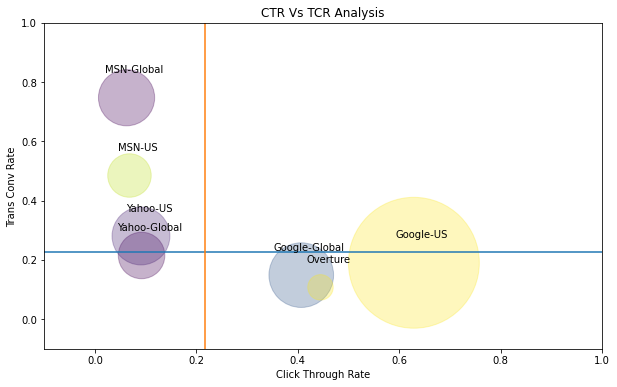

In [148]:
# analysis
x = t_f['CTR'].drop(['All']) * 10
y = t_f['TCR'].drop(['All'])
size = t_f['Sum Net Revenue'].drop(['All'])/10

color = np.random.rand(7)
x_glb = t_f['CTR']['All'] * 10
y_glb = t_f['TCR']['All']

plt.figure(figsize=(10,6))
plt.axis([-0.1, 1, -0.1, 1])
plt.xlabel('Click Through Rate')
plt.ylabel('Trans Conv Rate')
plt.title('CTR Vs TCR Analysis')

plt.scatter(x, y, s = size, c= color, alpha = 0.3)


plt.plot([-0.1, 1], [y_glb, y_glb])
plt.plot([x_glb, x_glb], [-0.1, 1])

# annoation
for Xi, Yi, i in zip(x, y, t_f.index):
    plt.annotate(i, (Xi, Yi), textcoords = "offset pixels", xytext = (8,25), ha='center')

#     plt.savefig("bubble.png")
plt.show()

In [149]:
#2
t_f['TCR'].sort_values(ascending = False)

Publisher
MSN-Global       0.746781
MSN-US           0.484429
Yahoo-US         0.280389
All              0.225051
Yahoo-Global     0.214784
Google-US        0.190173
Google-Global    0.148462
Overture         0.107325
Name: TCR, dtype: float64

In [150]:
#3
t_f['CTR'].sort_values(ascending = False)

Publisher
Google-US        0.062876
Overture         0.044463
Google-Global    0.040675
All              0.021764
Yahoo-Global     0.009194
Yahoo-US         0.009075
MSN-US           0.006810
MSN-Global       0.006236
Name: CTR, dtype: float64

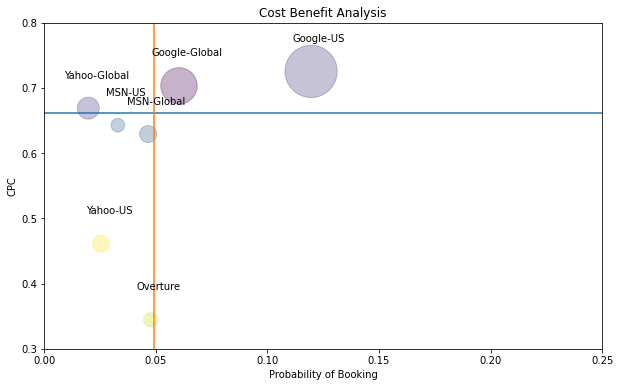

In [151]:
#4: Cost Benefit Analysis Analysis

x = t_f['Prob Booking'].drop(['All']) * 10
y = t_f['Avg CPC'].drop(['All'])
size = t_f['Total Advertising Cost'].drop(['All'])

color = np.random.rand(7)
x_glb = t_f['Prob Booking']['All']*10
y_glb = t_f['Avg CPC']['All']

plt.figure(figsize=(10,6))
plt.axis([0, 0.25, 0.3, 0.8])
plt.xlabel('Probability of Booking')
plt.ylabel('CPC')
plt.title('Cost Benefit Analysis')

plt.scatter(x, y, s = size, c= color, alpha = 0.3)

# plot global avg line
plt.plot([0, 0.25], [y_glb, y_glb])
plt.plot([x_glb, x_glb], [0.3, 0.8])
# annoation
for Xi, Yi, i in zip(x, y, t_f.index):
    plt.annotate(i, (Xi, Yi), textcoords = "offset pixels", xytext = (8,30), ha='center')

#     plt.savefig("bubble.png")
plt.show()

In [155]:
print('Probability of Booking Rank: ', t_f['Prob Booking'].sort_values(ascending = False))

Probability of Booking Rank:  Publisher
Google-US        0.011957
Google-Global    0.006039
All              0.004898
Overture         0.004772
MSN-Global       0.004657
MSN-US           0.003299
Yahoo-US         0.002544
Yahoo-Global     0.001975
Name: Prob Booking, dtype: float64


In [154]:
print('CPC: ', t_f['Avg CPC'].sort_values(ascending = False))

CPC:  Publisher
Google-US        0.725256
Google-Global    0.703097
Yahoo-Global     0.668898
All              0.660730
MSN-US           0.642768
MSN-Global       0.629206
Yahoo-US         0.461183
Overture         0.344378
Name: Avg CPC, dtype: float64


In [153]:
x_glb =  t_f['Prob Booking']['All'] * 100
y_glb = t_f['Avg CPC']['All'] 

In [158]:
x = t_f['Prob Booking'].drop(['All']) * 100 #scale probabilities by 100
y = t_f['Avg CPC']. drop(['All']) 
size = t_f['Total Advertising Cost'].drop(['All'])  #make bubble smaller 
color = np.random.rand(7)



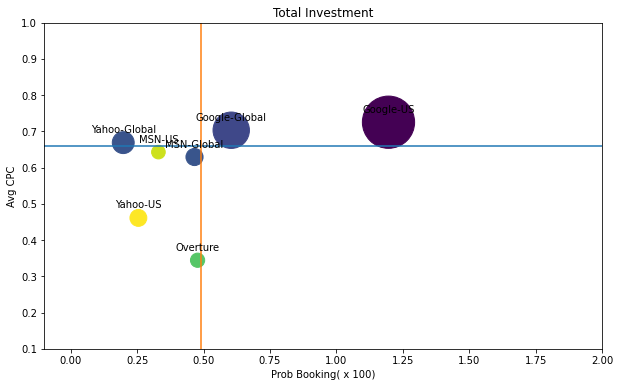

In [159]:


plt.figure(figsize = (10,6))
plt.axis([-0.1, 2, 0.1, 1])
plt.xlabel('Prob Booking( x 100)')
plt.ylabel('Avg CPC')
plt.title('Total Investment')

plt.scatter(x,y, s = size, c = color)

#plot the global average 
plt.plot([-0.1, 2], [y_glb, y_glb])
plt.plot([x_glb, x_glb], [0.1, 1])

# put a label for each dot 
for xi, yi, i in zip(x, y, x.index):
    plt.annotate(i, (xi, yi), textcoords = "offset pixels", xytext =(0,10), ha = 'center')

plt.savefig("bubble.png")
plt.show()

In [171]:
#5 Analyse mean ROA for different keywords

new_table = pd.pivot_table(df, values = ['Clicks','Total Advertising Cost', 
                                 'Revenue per Conversion', 'Total Revenue'],
                     index = ['Keyword Type','Publisher'], aggfunc = np.sum, margins = True)
                    
new_table['Net Revenue'] = (new_table['Total Revenue'] - new_table['Total Advertising Cost']) 
new_table['ROA']=new_table['Net Revenue']/ new_table['Total Advertising Cost']
new_table


Clicks  Revenue per Conversion  \
Keyword Type Publisher                                       
broad        Google-Global     464            27781.942755   
             Google-US        1605            40837.402274   
             MSN-Global        185            25845.422498   
             MSN-US            104            16892.292447   
             Overture          187             5220.109364   
             Yahoo-Global      369            15911.523799   
             Yahoo-US          370            23796.518051   
exact        Google-Global     464            25400.211974   
             Google-US        1329            27104.787496   
             MSN-Global         85            16619.823156   
             MSN-US             90            11685.556367   
             Overture          279             3901.382683   
             Yahoo-Global      157            15911.486756   
             Yahoo-US           77            13189.526029   
phrase       Google-Global     958            23682.584288   
             Google-US         831            29295.756052   
             MSN-Global        196            15677.909176   
             MSN-US             95             9968.383836   
             Overture          121             2789.333578   
             Yahoo-Global      191            16095.669416   
             Yahoo-US          170            12759.348572   
All                           8327           380366.970567   

                            Total Advertising Cost  Total Revenue  \
Keyword Type Publisher                                              
broad        Google-Global                  342.87   12427.742774   
             Google-US                      904.76   87100.978543   
             MSN-Global                     128.02   14611.302499   
             MSN-US                          67.67   10391.225914   
             Overture                        56.78    2553.889994   
             Yahoo-Global                   202.50    7894.139452   
             Yahoo-US                       133.54   26004.372812   
exact        Google-Global                  229.02   10348.869472   
             Google-US                     1266.31   22556.334241   
             MSN-Global                      56.90    5964.340712   
             MSN-US                          73.18    4774.548975   
             Overture                       100.56    2282.598815   
             Yahoo-Global                   107.62    6579.963830   
             Yahoo-US                        49.77    1314.891812   
phrase       Google-Global                  754.15   20326.686488   
             Google-US                      559.52   64355.484277   
             MSN-Global                     108.29   11297.864023   
             MSN-US                          44.91    3938.211401   
             Overture                        44.81    1842.709262   
             Yahoo-Global                   169.48    7652.474562   
             Yahoo-US                       101.24    6431.113246   
All                                        5501.90  330649.743102   

                              Net Revenue         ROA  
Keyword Type Publisher                                 
broad        Google-Global   12084.872774   35.246224  
             Google-US       86196.218543   95.269705  
             MSN-Global      14483.282499  113.132967  
             MSN-US          10323.555914  152.557351  
             Overture         2497.109994   43.978690  
             Yahoo-Global     7691.639452   37.983405  
             Yahoo-US        25870.832812  193.730963  
exact        Google-Global   10119.849472   44.187623  
             Google-US       21290.024241   16.812648  
             MSN-Global       5907.440712  103.821454  
             MSN-US           4701.368975   64.243905  
             Overture         2182.038815   21.698874  
             Yahoo-Global     6472.343830   60.140716  
             Yahoo-US         1265.121812 

In [173]:
avg_all = new_table.drop('All')
avg_all.groupby(['Keyword Type']).aggregate('mean')

C:\Users\neo_k\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Clicks,Revenue per Conversion,Total Advertising Cost,Total Revenue,Net Revenue,ROA
Keyword Type,,,,,,
broad,469.142857,22326.458741,262.305714,22997.664570,22735.358855,95.985615
exact,354.428571,16258.967780,269.051429,7688.792551,7419.741122,48.046369
phrase,366.000000,15752.712131,254.628571,16549.220465,16294.591894,68.113134


In [177]:
#6 
t_f
t_f.sort_values(by = ['ROA'], ascending = False)

,Sum Net Revenue,ROA,Avg CPC,Conversions,Total Advertising Cost,Prob Booking,TCR,CTR,Rev / Conversion
Publisher,,,,,,,,,
Yahoo-US,33465.827869,117.609657,0.461183,173,284.55,0.002544,0.280389,0.009075,195.088889
MSN-Global,31580.297235,107.705389,0.629206,348,293.21,0.004657,0.746781,0.006236,91.590538
MSN-US,18918.226289,101.842303,0.642768,140,185.76,0.003299,0.484429,0.006810,136.457045
Google-US,171282.207061,62.727179,0.725256,716,2730.59,0.011957,0.190173,0.062876,243.034633
All,325147.843102,59.097374,0.660730,1874,5501.90,0.004898,0.225051,0.021764,176.440631
Yahoo-Global,21646.977844,45.135483,0.668898,154,479.60,0.001975,0.214784,0.009194,143.679077
Overture,6477.048070,32.040802,0.344378,63,202.15,0.004772,0.107325,0.044463,106.019017
Google-Global,41777.258733,31.505278,0.703097,280,1326.04,0.006039,0.148462,0.040675,153.940353


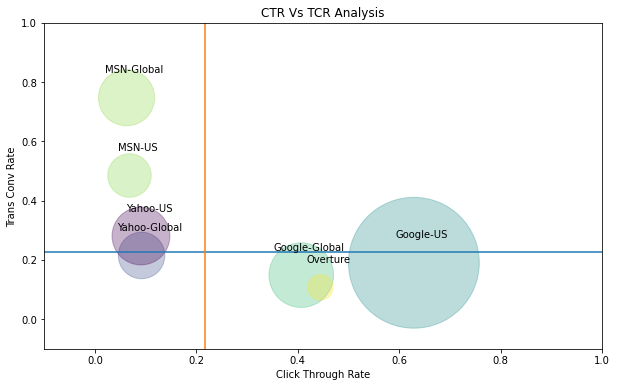

In [183]:
# 7

# analysis
x = t_f['CTR'].drop(['All']) * 10
y = t_f['TCR'].drop(['All'])
size = t_f['Sum Net Revenue'].drop(['All'])/10

color = np.random.rand(7)
x_glb = t_f['CTR']['All'] * 10
y_glb = t_f['TCR']['All']

plt.figure(figsize=(10,6))
plt.axis([-0.1, 1, -0.1, 1])
plt.xlabel('Click Through Rate')
plt.ylabel('Trans Conv Rate')
plt.title('CTR Vs TCR Analysis')

plt.scatter(x, y, s = size, c= color, alpha = 0.3)


plt.plot([-0.1, 1], [y_glb, y_glb])
plt.plot([x_glb, x_glb], [-0.1, 1])

# annoation
for Xi, Yi, i in zip(x, y, t_f.index):
    plt.annotate(i, (Xi, Yi), textcoords = "offset pixels", xytext = (8,25), ha='center')

#     plt.savefig("bubble.png")
plt.show()

